In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.dummy import DummyClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest,chi2, RFE, RFECV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [70]:
url='https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv'
df=pd.read_csv(url)
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [71]:
df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [72]:
np.random.seed(42)
exams=df.drop(columns=['id','diagnostico','exame_33'])
diagnosis=df.diagnostico
x_train,x_test,y_train,y_test=train_test_split(exams,diagnosis,test_size=0.3,stratify=diagnosis)

In [73]:
model_RFC=RandomForestClassifier()
model_RFC.fit(x_train,y_train)
accuracy=model_RFC.score(x_test,y_test)
print(f' Foram usados {len(y_train)} para o treinamento\nacuracia foi de {accuracy*100}')

 Foram usados 398 para o treinamento
acuracia foi de 96.49122807017544


In [74]:
model_dummy=DummyClassifier(strategy='most_frequent')
model_dummy.fit(x_train,y_train)
accuracy_dummy=model_dummy.score(x_test,y_test)
print(f'Foram usados {len(y_train)} para o treinamento\nacuracia foi de {accuracy_dummy*100}')
    

Foram usados 398 para o treinamento
acuracia foi de 62.57309941520468


In [75]:
scaler=StandardScaler()
scaler.fit(exams)
exams_2=scaler.transform(exams)
exams_2=pd.DataFrame(exams_2,columns=exams.keys())


df_plot=pd.concat([diagnosis,exams_2],axis=1)
df_plot=pd.melt(df_plot,id_vars='diagnostico',var_name='exames',value_name='valores')
df_plot.head()

,diagnostico,exames,valores
0,M,exame_1,1.097064
1,M,exame_1,1.829821
2,M,exame_1,1.579888
3,M,exame_1,-0.768909
4,M,exame_1,1.750297


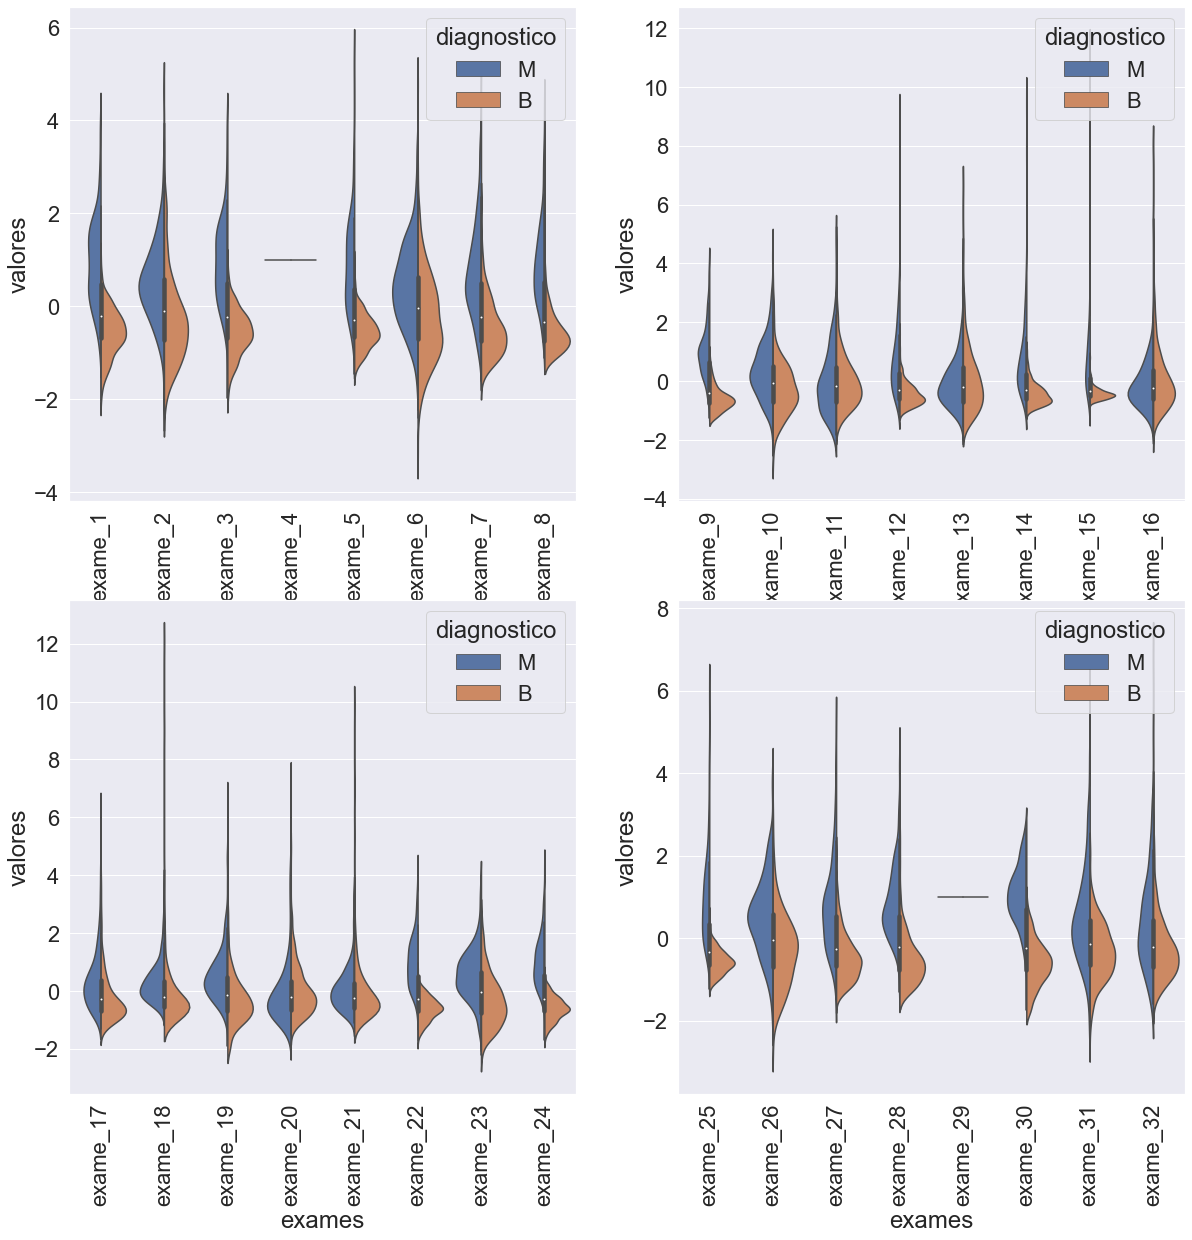

In [76]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
label_exams=df_plot.exames.unique()
sns.violinplot(ax=ax[0,0],x='exames',y='valores',data=df_plot[df_plot.exames.isin(label_exams[0:8])],hue='diagnostico',split=True)
ax[0,0].tick_params(rotation=90,axis='x')
sns.violinplot(ax=ax[0,1],x='exames',y='valores',data=df_plot[df_plot.exames.isin(label_exams[8:16])],hue='diagnostico',split=True)
ax[0,1].tick_params(rotation=90,axis='x')
sns.violinplot(ax=ax[1,0],x='exames',y='valores',data=df_plot[df_plot.exames.isin(label_exams[16:24])],hue='diagnostico',split=True)
ax[1,0].tick_params(rotation=90,axis='x')
sns.violinplot(ax=ax[1,1],x='exames',y='valores',data=df_plot[df_plot.exames.isin(label_exams[24:])],hue='diagnostico',split=True)
ax[1,1].tick_params(rotation=90,axis='x')

In [77]:
useless_exams=['exame_4','exame_29']

In [78]:
def classificar(values):
    x_train,x_test,y_train,y_test=train_test_split(values,diagnosis,test_size=0.3,stratify=diagnosis)
    model_RFC=RandomForestClassifier()
    model_RFC.fit(x_train,y_train)
    accuracy=model_RFC.score(x_test,y_test)
    print(f' Foram usados {len(y_train)} para o treinamento do modelo RANDOM FOREST\nacuracia foi de {accuracy*100}')

In [79]:
exams_3=exams_2.drop(columns=useless_exams)
classificar(exams_3)

 Foram usados 398 para o treinamento do modelo RANDOM FOREST
acuracia foi de 95.90643274853801


<AxesSubplot:>

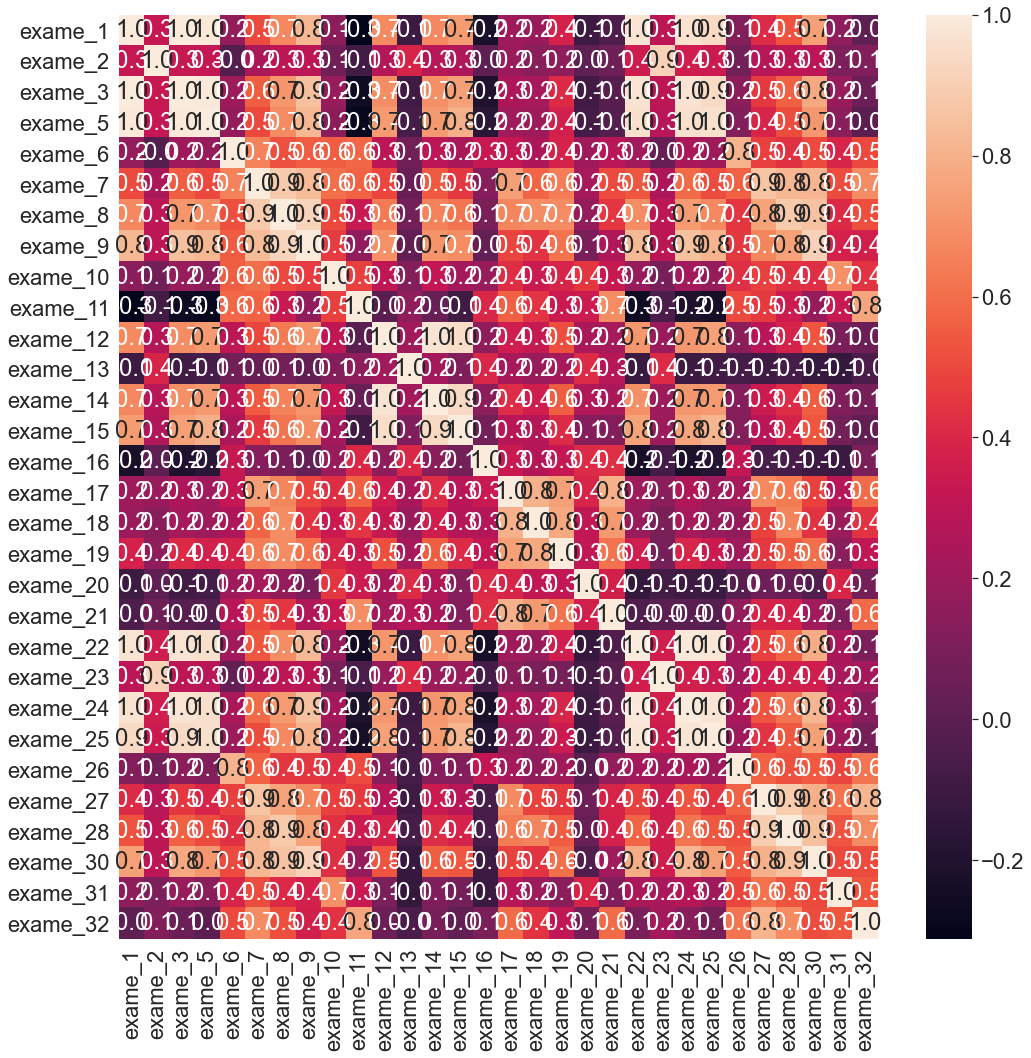

In [80]:
plt.figure(figsize=(17,17))
correlation_matrix=exams_3.corr()
sns.heatmap(correlation_matrix,annot=True,fmt='.1f')

In [81]:
matriz_correlacao_v1 = correlation_matrix[correlation_matrix>0.99]
matriz_correlacao_v1

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
exame_1,1.000000,NaN,0.997855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_3,0.997855,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_8,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exame_11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2


exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [83]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [84]:
exams_4 = exams_3.drop(columns=variaveis_correlacionadas.keys())


In [85]:
classificar(exams_4)


 Foram usados 398 para o treinamento do modelo RANDOM FOREST
acuracia foi de 96.49122807017544


In [86]:
exams_5 = exams_3.drop(columns=["exame_3", "exame_24"])
classificar(exams_5)

 Foram usados 398 para o treinamento do modelo RANDOM FOREST
acuracia foi de 95.90643274853801


In [87]:
SEED = 42
np.random.seed(SEED)


valores_exames_v6 = exams.drop(columns=["exame_4", "exame_29", "exame_3", "exame_24"])

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnosis, test_size = 0.3)
selecionar_kmelhores = SelectKBest(chi2, 10)
selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [88]:
classificador = RandomForestClassifier()
classificador.fit(treino_kbest, treino_y)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)* 100))

Resultado da classificação 97.66%


In [89]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[107,   1],
       [  3,  60]], dtype=int64)

[Text(0.5, 38.5, 'Predição'), Text(56.5, 0.5, 'Real')]

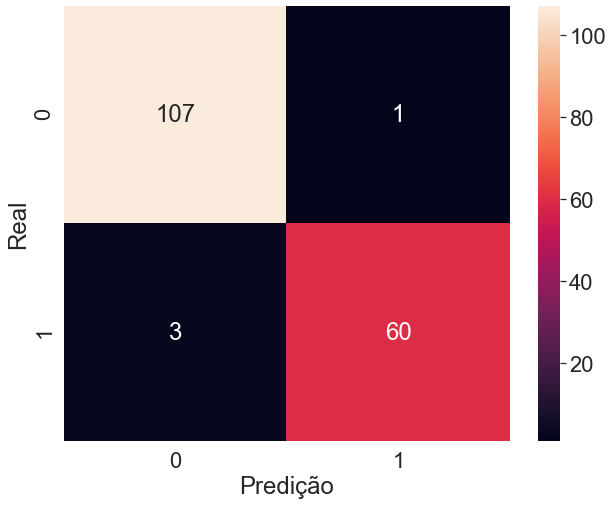

In [90]:
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

Resultado da classificação 95.91%


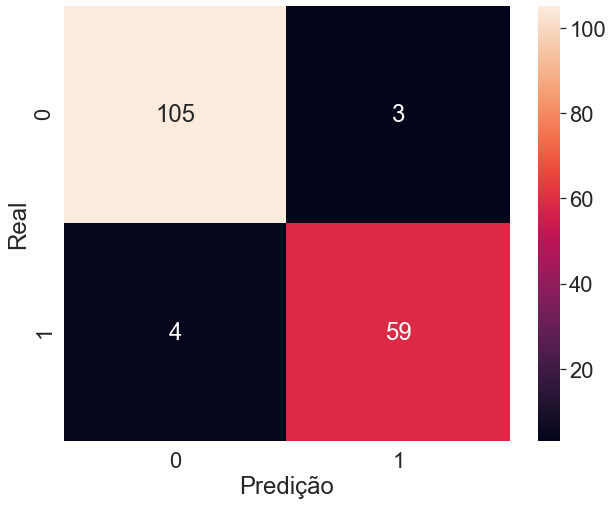

In [91]:
np.random.seed(42)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnosis, test_size = 0.3)

classificador = RandomForestClassifier()
classificador.fit(treino_x, treino_y)


selection_RFE=RFE(estimator=classificador,n_features_to_select=10, step=1)
selection_RFE.fit(treino_x,treino_y)
rfe_train=selection_RFE.transform(treino_x)
rfe_test=selection_RFE.transform(teste_x)
classificador.fit(rfe_train,treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(rfe_test))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")
print("Resultado da classificação %.2f%%" % (classificador.score(rfe_test, teste_y)* 100))


Resultado da classificação 96.49%


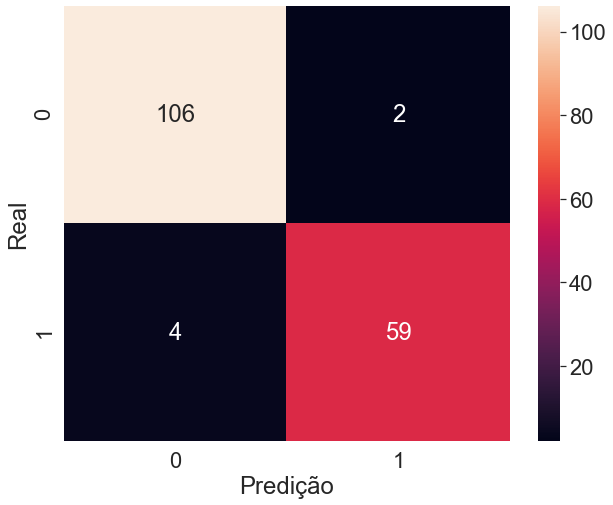

In [92]:
np.random.seed(42)
treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnosis, test_size = 0.3)

classificador = RandomForestClassifier()
classificador.fit(treino_x, treino_y)


selection_RFECV=RFECV(estimator=classificador,cv=10,step=1,scoring='accuracy')
selection_RFECV.fit(treino_x,treino_y)
rfecv_train=selection_RFECV.transform(treino_x)
rfecv_test=selection_RFECV.transform(teste_x)
classificador.fit(rfecv_train,treino_y)

matriz_confusao = confusion_matrix(teste_y, classificador.predict(rfecv_test))
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")
print("Resultado da classificação %.2f%%" % (classificador.score(rfecv_test, teste_y)* 100))


In [93]:
treino_x.columns[selection_RFECV.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_8', 'exame_9', 'exame_15',
       'exame_22', 'exame_23', 'exame_25', 'exame_28', 'exame_30'],
      dtype='object')

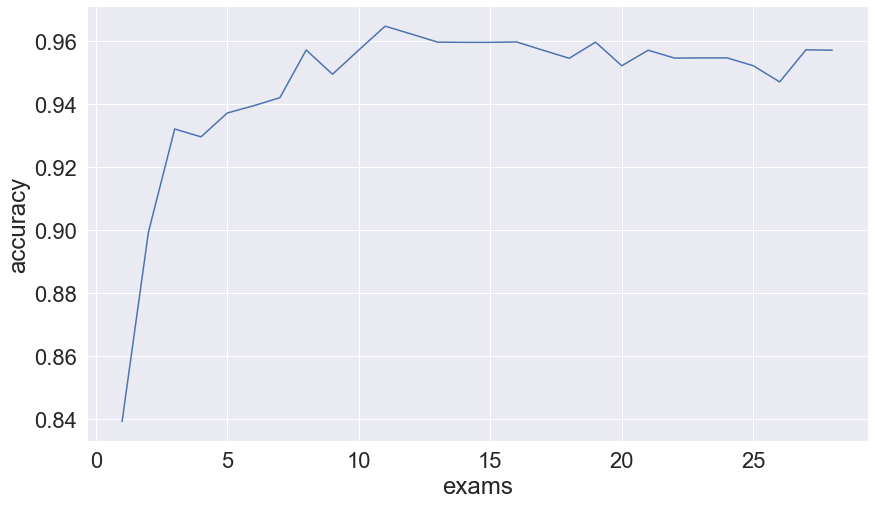

In [94]:
plt.figure(figsize=(14,8))
plt.xlabel('exams')
plt.ylabel('accuracy')
plt.grid(True)
plt.plot(np.arange(1,29),selection_RFECV.grid_scores_)

In [95]:
SEED = 42
np.random.seed(SEED)

classificador = RandomForestClassifier(n_estimators=100)

selecionador_rfe = RFE(estimator=classificador, n_features_to_select=2, step=1)
selecionador_rfe.fit(valores_exames_v6, diagnosis)
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)

In [96]:
valores_exames_v7.shape

(569, 2)

<AxesSubplot:>

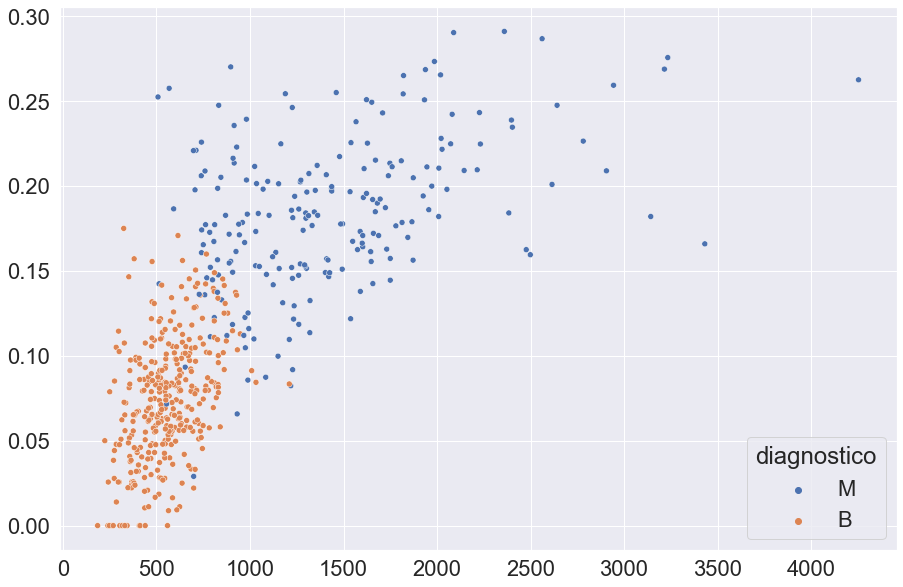

In [97]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=valores_exames_v7[:,0],y=valores_exames_v7[:,1],hue=diagnosis)

In [98]:
pca=PCA(n_components=2)
valores_exames_v8=pca.fit_transform(exams_2)

In [99]:
valores_exames_v8

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

<AxesSubplot:>

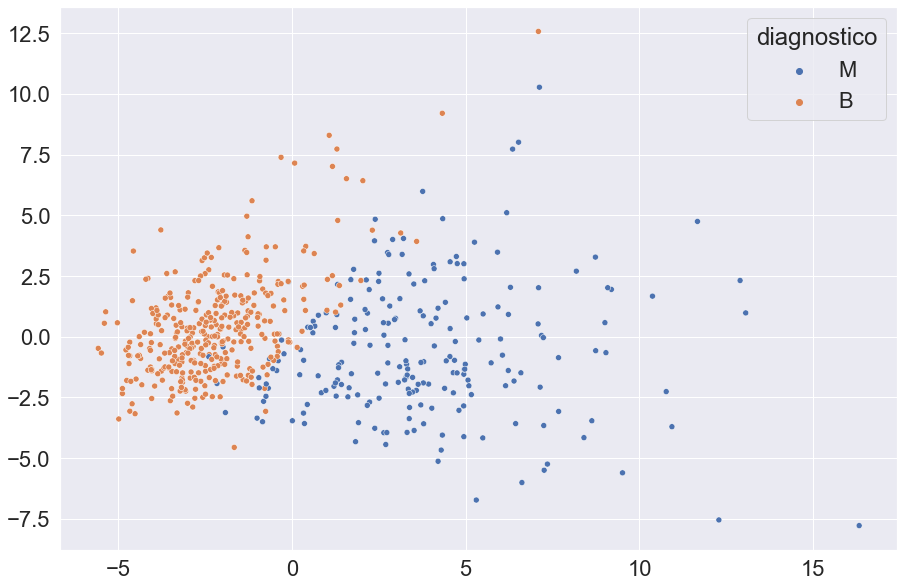

In [100]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=valores_exames_v8[:,0],y=valores_exames_v8[:,1],hue=diagnosis)

<AxesSubplot:>

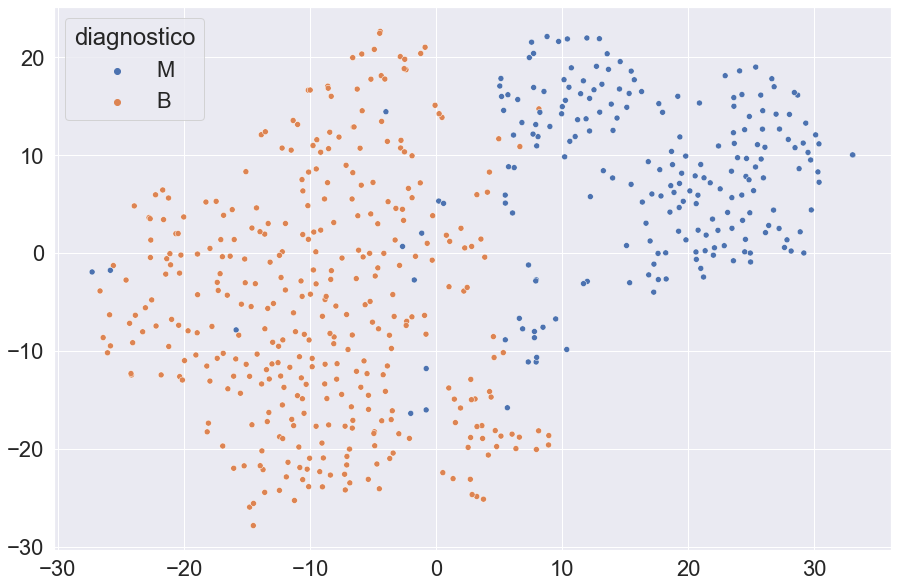

In [102]:
tsne=TSNE(n_components=2)
valores_exames_v8=tsne.fit_transform(exams_5)
plt.figure(figsize=(15,10))
sns.scatterplot(x=valores_exames_v8[:,0],y=valores_exames_v8[:,1],hue=diagnosis)